In [1]:
import os
os.system('clear')

import numpy as np
import pandas as pd

from termcolor import colored
from SecretColors.palette import Palette
material = Palette("material", color_mode = 'hexa')

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'SF Compact Text'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])

# os.chdir("./nordpool")

In [ ]:
flist = [f for f in sorted(os.listdir("./raw")) if not (f.startswith('.') or f.startswith('~'))]

print(flist)

for filename in flist:
    print(filename)
    y = int(filename[14:18])
    print(y)
    df = pd.read_html(f"./raw/{filename}", header=[2,3], decimal=',', thousands='.')
    df = df[0]
    df2 = df[(country)]
    df2 = df2.apply(pd.to_numeric, args=('coerce',))
    df2['Date'] = df.iloc[:, [0]]
    df2['Time'] = df.iloc[:, [1]]
    df2['Date'] = pd.to_datetime(df2['Date'])
    df = df2

    df.to_pickle(f"./{os.path.splitext(filename)[0]}.pkl")


...

Year: 2013

Buy volume: 467398 MWh
Sell volume: 402690 MWh



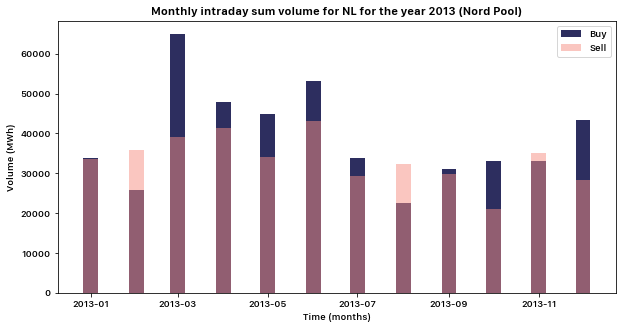


...

Year: 2014

Buy volume: 700981 MWh
Sell volume: 612847 MWh



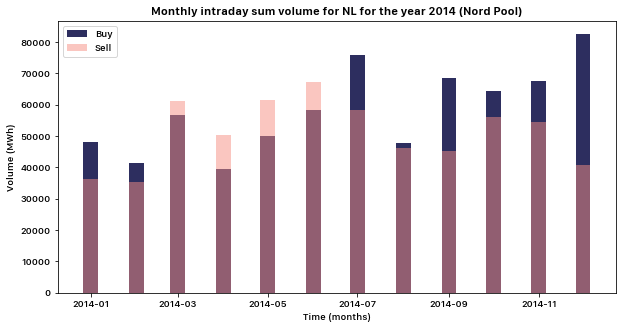


...

Year: 2015

Buy volume: 549584 MWh
Sell volume: 374836 MWh



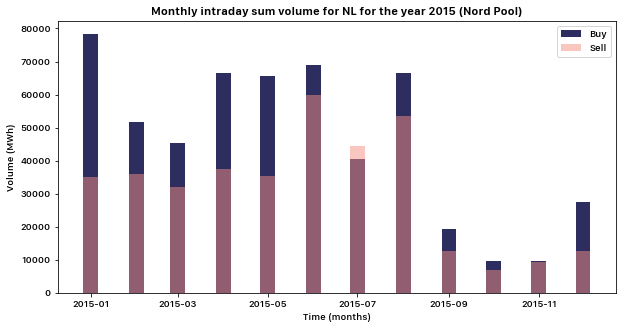


...

Year: 2016

Buy volume: 173636 MWh
Sell volume: 60217 MWh



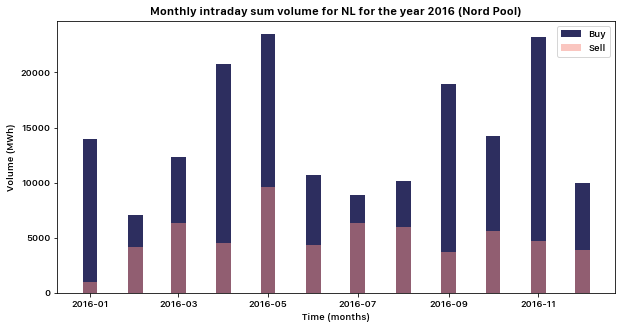


...

Year: 2017

Buy volume: 145704 MWh
Sell volume: 80052 MWh



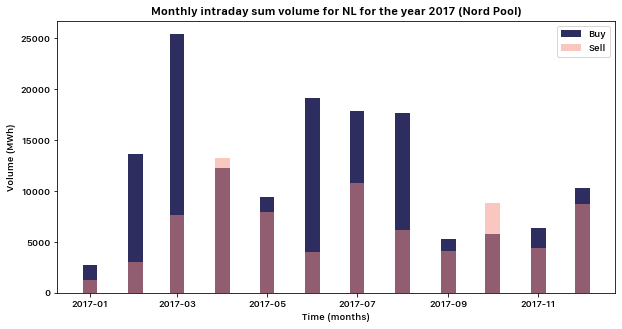


...

Year: 2018

Buy volume: 3175 MWh
Sell volume: 2854 MWh



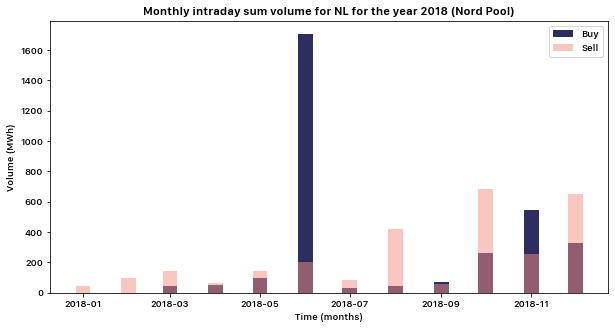


...

Year: 2019

Buy volume: 82857 MWh
Sell volume: 72470 MWh



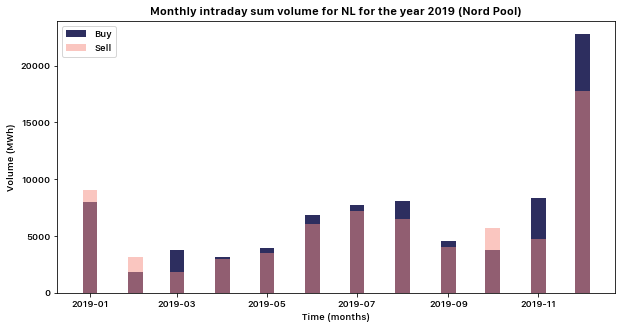


...

Year: 2020

Buy volume: 280746 MWh
Sell volume: 268330 MWh



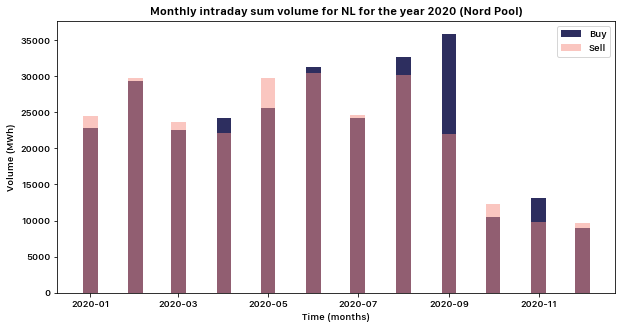


...

Period: 2013–2020
Buy volume: 2404081 MWh
Sell volume: 1874295 MWh

...



In [2]:
years = ['2013','2014','2015','2016','2017','2018','2019','2020']
country = 'NL'
dfo = pd.DataFrame()

buy = []
sell = []
breaks = []

for y in years:
    i = years.index(y)
    df = pd.read_pickle(f"./elbas-volumes_{y}_hourly.pkl")
    df_group = df.groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum()
    df_group['Date'] = df_group.index
    df_group['Date'] = pd.to_datetime(df_group['Date'], format='(%Y, %m)')    
    
    buy.append(df['Buy'].sum())
    sell.append(df['Sell'].sum())
    
    print('')
    print(colored('...','white'))
    print('')
    print(colored(f'Year: {y}', 'blue'))
    print('')
    print(colored(f'Buy volume: {int(round(buy[i]))} MWh', 'blue'))
    print(colored(f'Sell volume: {int(round(sell[i]))} MWh', 'blue'))
    print('')

    dfo = dfo.append(df_group, ignore_index = False)
    breaks.append(len(dfo))

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(df_group['Date'], df_group['Buy'], width=10)
    ax.bar(df_group['Date'], df_group['Sell'], width=10, alpha=0.5)
    ax.set_title(f'Monthly intraday sum volume for {country} for the year {y} (Nord Pool)')
    ax.set_xlabel(r'Time (months)')
    ax.set_ylabel(r'Volume (MWh)')
    ax.legend(['Buy', 'Sell'])
    plt.show()

print('')
print(colored('...','white'))
print('')
print(colored(f'Period: {years[0]}–{years[-1]}', 'blue'))
print(colored(f'Buy volume: {int(round(sum(buy)))} MWh', 'blue'))
print(colored(f'Sell volume: {int(round(sum(sell)))} MWh', 'blue'))
print('')
print(colored('...','white'))
print('')

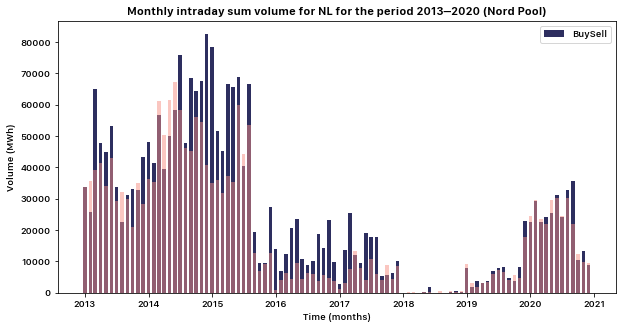

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(dfo['Date'], dfo['Buy'], width=20)
ax.bar(dfo['Date'], dfo['Sell'], width=20, alpha=0.5)
ax.set_title(f'Monthly intraday sum volume for {country} for the period {years[0]}–{years[-1]} (Nord Pool)')
ax.set_xlabel(r'Time (months)')
ax.set_ylabel(r'Volume (MWh)')
ax.legend(['Buy''Sell'])
plt.show()